# Find the best model

## Wine

In [74]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
cd /content/drive/MyDrive/colab

/content/drive/MyDrive/colab


In [91]:
wine = pd.read_csv('dataset/wine.csv', header = None)
wine

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


### Preprocessing

In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(wine.iloc[:, : -1].values)

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, wine.iloc[:, -1].values, stratify = wine.iloc[:, -1].values, random_state = seed
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872,), (1625,))

### Processing

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [95]:
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 30)                390       
_________________________________________________________________
dense_25 (Dense)             (None, 12)                372       
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.compile(
    optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']
)

#### Setting for saving model

In [97]:
modelpath = '1. Basic Model/Models/best_wine_{epoch:03d}_{val_loss:.4f}.h5'

In [98]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(
    modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True
)

#### Learing and saving model

In [99]:
history = model.fit(
    X_train, y_train, validation_split = 0.2,
    epochs = 200, batch_size = 200, verbose = 0, callbacks = [checkpointer]
)


Epoch 00001: val_loss improved from inf to 0.65598, saving model to 1. Basic Model/Models/best_wine_001_0.6560.h5

Epoch 00002: val_loss improved from 0.65598 to 0.62044, saving model to 1. Basic Model/Models/best_wine_002_0.6204.h5

Epoch 00003: val_loss improved from 0.62044 to 0.54906, saving model to 1. Basic Model/Models/best_wine_003_0.5491.h5

Epoch 00004: val_loss improved from 0.54906 to 0.46494, saving model to 1. Basic Model/Models/best_wine_004_0.4649.h5

Epoch 00005: val_loss improved from 0.46494 to 0.39372, saving model to 1. Basic Model/Models/best_wine_005_0.3937.h5

Epoch 00006: val_loss improved from 0.39372 to 0.30366, saving model to 1. Basic Model/Models/best_wine_006_0.3037.h5

Epoch 00007: val_loss improved from 0.30366 to 0.22050, saving model to 1. Basic Model/Models/best_wine_007_0.2205.h5

Epoch 00008: val_loss improved from 0.22050 to 0.16149, saving model to 1. Basic Model/Models/best_wine_008_0.1615.h5

Epoch 00009: val_loss improved from 0.16149 to 0.12

#### Evaluation with the best model

In [105]:
from tensorflow.keras.models import load_model
best_model = load_model('1. Basic Model/Models/best_wine_141_0.0282.h5')

In [106]:
best_model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.9920


[0.027061833068728447, 0.9919999837875366]

### Visualization

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']
y_loss = history.history['loss']
y_vloss = history.history['val_loss']
x_len = np.arange(len(y_acc))

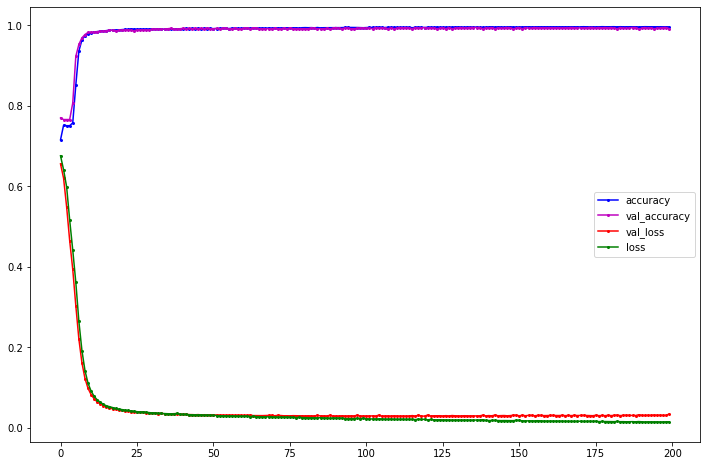

In [112]:
plt.figure(figsize = (12, 8))
plt.plot(x_len, y_acc, 'bo-', markersize = 2, label = 'accuracy')
plt.plot(x_len, y_vacc, 'mo-', markersize = 2, label = 'val_accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize = 2, label = 'val_loss')
plt.plot(x_len, y_loss, 'go-', markersize = 2, label = 'loss')
plt.legend()
plt.show()